<a href="https://colab.research.google.com/github/Karanmanolaa/Customer-churn-prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details of the features
##### RowNumber—corresponds to the record (row) number and has no effect on the output.
##### CustomerId—contains random values and has no effect on customer leaving the bank.
##### Surname—the surname of a customer has no impact on their decision to leave the bank.
##### CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
##### Geography—a customer’s location can affect their decision to leave the bank.
##### Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
##### Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
##### Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
##### Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
##### NumOfProducts—refers to the number of products that a customer has purchased through the bank.
##### HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
##### IsActiveMember—active customers are less likely to leave the bank.
##### EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
##### Exited—whether or not the customer left the bank.
##### Complain—customer has complaint or not.
##### Satisfaction Score—Score provided by the customer for their complaint resolution.
##### Card Type—type of card hold by the customer.
##### Points Earned—the points earned by the customer for using credit card.

In [1]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score

In [2]:
df = pd.read_csv('/content/Customer_churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Dropping columns of no use
df.drop(columns=['Surname','RowNumber'], axis=1,inplace=True)

In [7]:
duplicates = df[df.duplicated('CustomerId', keep=False)]
duplicates

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [8]:
df.drop(columns=['CustomerId'], axis=1,inplace=True)

In [9]:
df.dropna(inplace = True)

## Explolatory data analysis

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


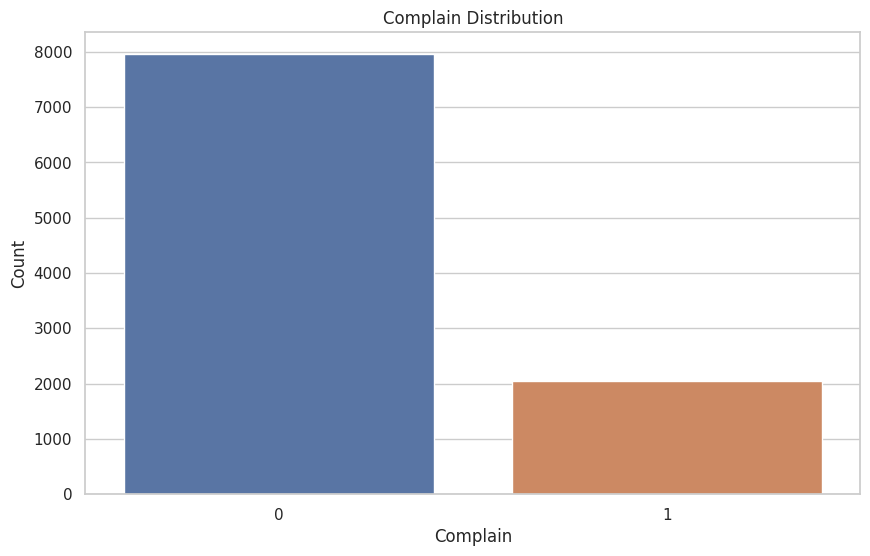

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Complain")
plt.title("Complain Distribution")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

In the dataset, there are a total of 10,000 records. Among these, 2,044 individuals have exited, while 7,956 individuals have chosen to stay. This class distribution highlights the imbalance in the data, with a significantly larger number of individuals staying compared to those who have exited.

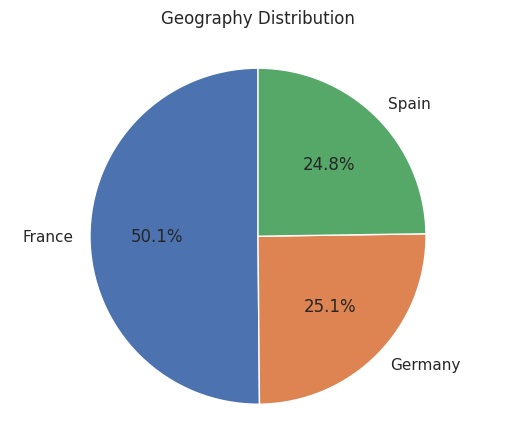

In [12]:
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title("Geography Distribution", pad=20)
plt.show()

In our dataset the information of the people is of 3 Countries .
1. France
2. Germany
3. Spain

<ipython-input-13-7bc2abe7bad2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

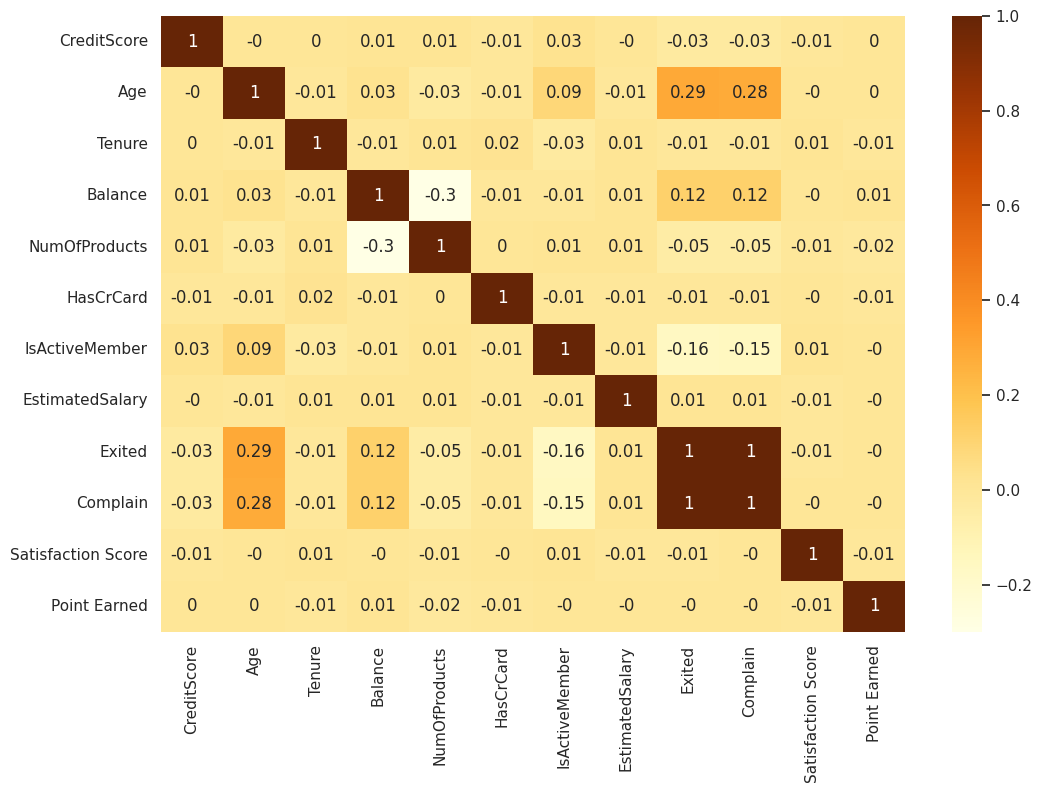

In [13]:
corr = df.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

It's evident from our analysis that the 'Complain' column exhibits a very high correlation with another variable. As part of our exploratory data analysis (EDA), we have identified this strong correlation, and we intend to remove the 'Complain' column from our dataset before proceeding with further analysis



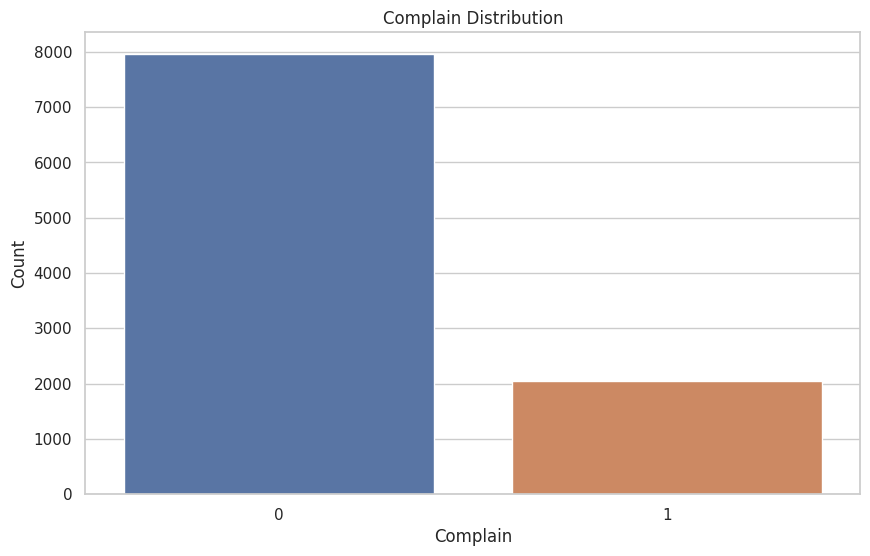

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Complain")
plt.title("Complain Distribution")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

In [15]:
df['Complain'].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

In [16]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [17]:
correlation_matrix = df.corr(method='pearson')['Exited']
print(correlation_matrix)

CreditScore          -0.026771
Age                   0.285296
Tenure               -0.013656
Balance               0.118577
NumOfProducts        -0.047611
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012490
Exited                1.000000
Complain              0.995693
Satisfaction Score   -0.005849
Point Earned         -0.004628
Name: Exited, dtype: float64


<ipython-input-17-32fdc6b89bce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')['Exited']


In [18]:
# Complain column is highly corelated
df = df.drop('Complain', axis = 1)


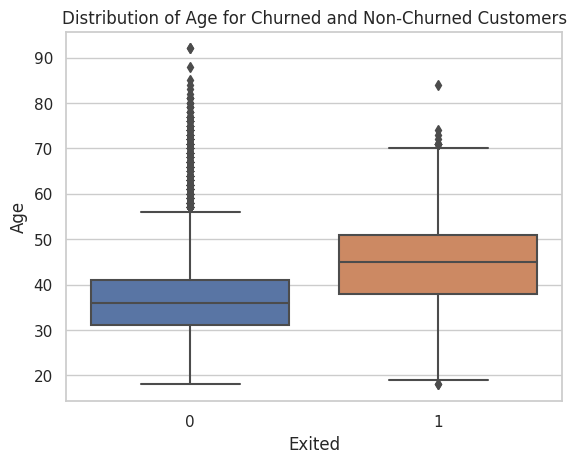

In [19]:
# Visualizing Age Distribution by Churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribution of Age for Churned and Non-Churned Customers')
plt.show()

The majority of customers who exited the bank fell within the age range of approximately 35 to 50

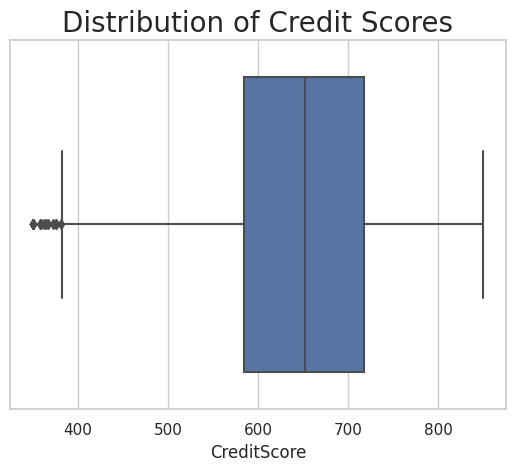

In [20]:
# CreditScore Distribution Boxplot
plt.title("Distribution of Credit Scores", fontsize=20)
sns.boxplot(x=df["CreditScore"])
plt.show()

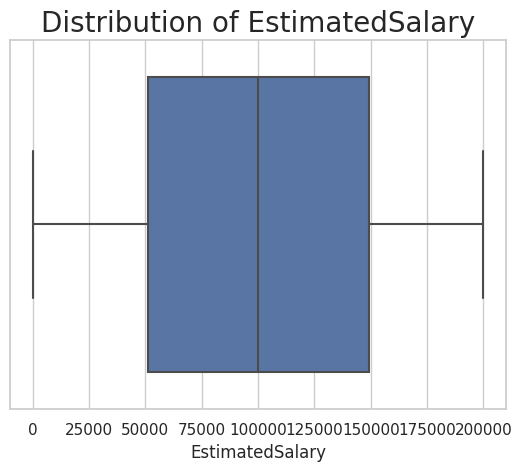

In [21]:
# Boxplot of EstimatedSalary
plt.title("Distribution of EstimatedSalary", fontsize=20)
sns.boxplot(x=df["EstimatedSalary"])
plt.show()

The estimated salary of the customers is between 50000 to 150000

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

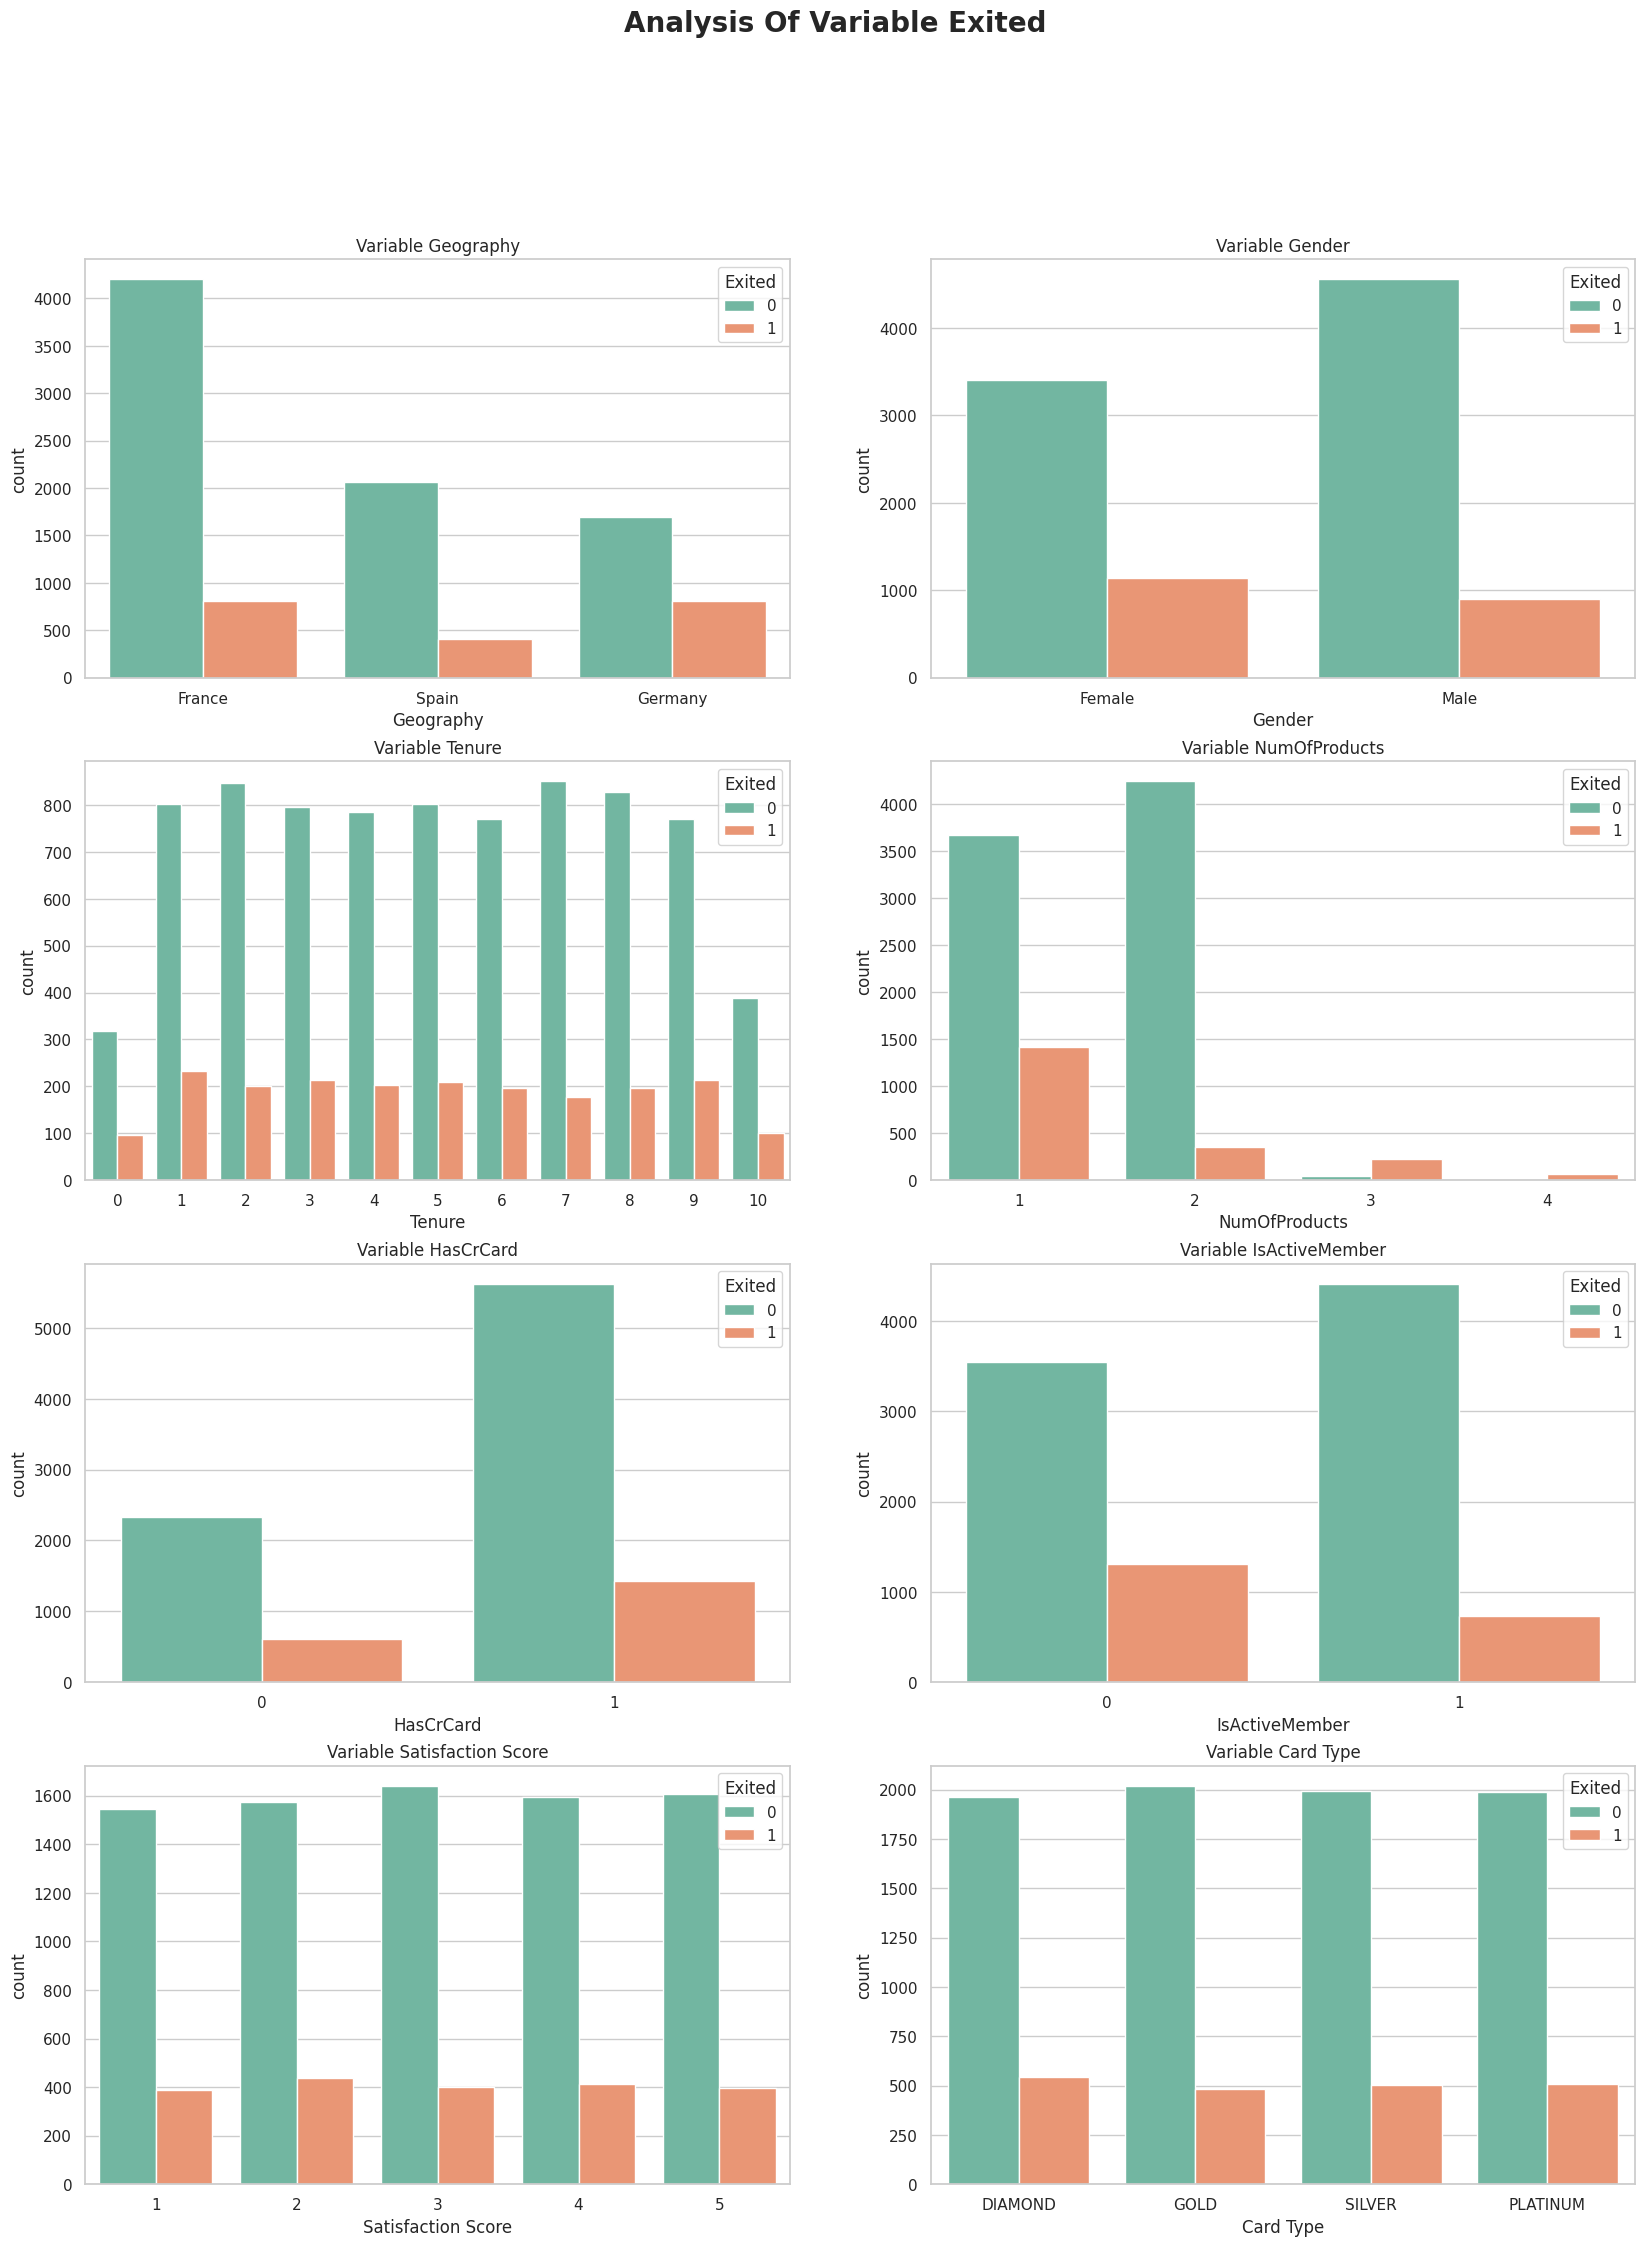

In [22]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

In [23]:
# Counting the number of customers in each group
df[['Geography', 'Card Type']].groupby(['Geography', 'Card Type']).size().reset_index()

,Geography,Card Type,0
0,France,DIAMOND,1230
1,France,GOLD,1235
2,France,PLATINUM,1264
3,France,SILVER,1285
4,Germany,DIAMOND,648
5,Germany,GOLD,653
6,Germany,PLATINUM,608
7,Germany,SILVER,600
8,Spain,DIAMOND,629
9,Spain,GOLD,614


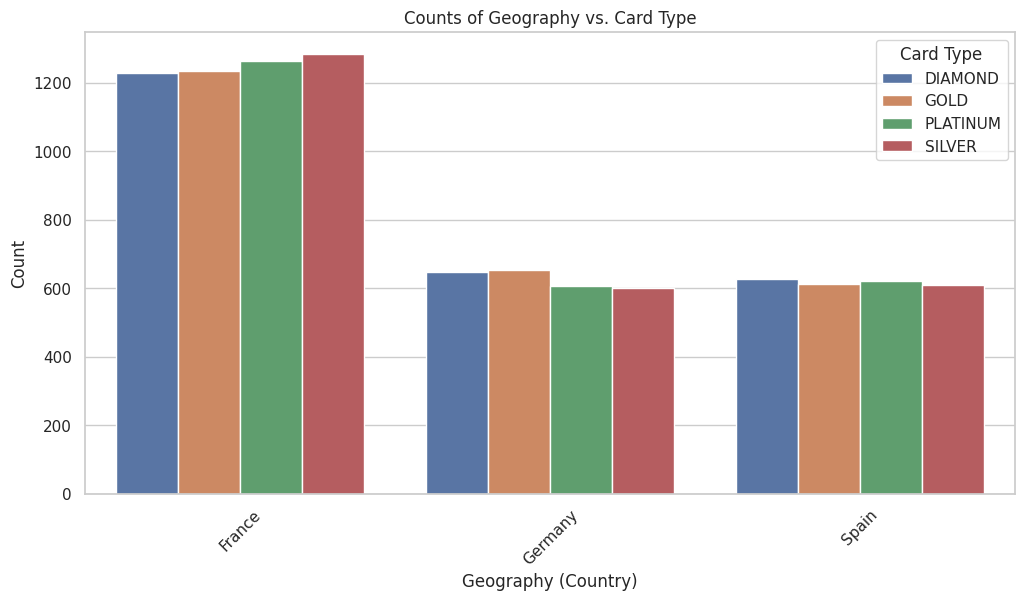

In [24]:
counts_df = df[['Geography', 'Card Type']].groupby(['Geography', 'Card Type']).size().reset_index()
counts_df.columns = ['Geography', 'Card Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Geography', y='Count', hue='Card Type', data=counts_df)
plt.title('Counts of Geography vs. Card Type')
plt.xlabel('Geography (Country)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Card Type')
plt.show()

This visualization displays the counts of customers categorized by their Geography and Card Type, providing insights into the distribution of customers across different countries and card types. And we can observe that most of the customers are of France

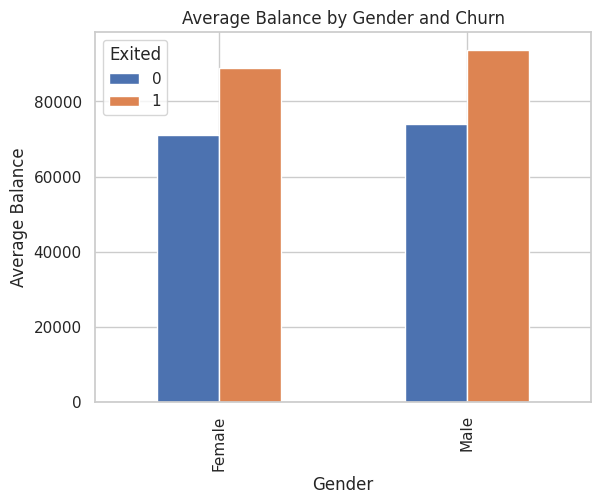

In [25]:
# Average balance by Gender and Churn
gender_balance_churn = df.groupby(['Gender', 'Exited'])['Balance'].mean().unstack()
gender_balance_churn.plot(kind='bar')
plt.title('Average Balance by Gender and Churn')
plt.ylabel('Average Balance')
plt.show()

In [26]:
# Creating separate subsets for customers who have exited and customers who have stayed
exit = df["Exited"] == 1
# Subset for customers who have exited
exited = df.where(exit)

exited = exited.sort_values("Balance", ascending = False)
exited = exited.dropna()
exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
2092,655.0,Spain,Male,38.0,3.0,250898.09,3.0,0.0,1.0,81054.00,1.0,1.0,SILVER,336.0
3280,583.0,France,Female,57.0,3.0,238387.56,1.0,0.0,1.0,147964.99,1.0,5.0,GOLD,552.0
8733,749.0,Spain,Male,42.0,9.0,222267.63,1.0,0.0,0.0,101108.85,1.0,4.0,GOLD,763.0
6717,663.0,Spain,Female,58.0,5.0,216109.88,1.0,0.0,1.0,74176.71,1.0,2.0,SILVER,251.0
138,584.0,Spain,Female,48.0,2.0,213146.20,1.0,1.0,0.0,75161.25,1.0,4.0,DIAMOND,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,850.0,France,Male,40.0,6.0,0.00,1.0,1.0,0.0,136985.08,1.0,1.0,DIAMOND,268.0
4224,767.0,Spain,Male,47.0,2.0,0.00,1.0,1.0,0.0,48161.18,1.0,3.0,GOLD,580.0
4260,587.0,France,Male,40.0,2.0,0.00,4.0,0.0,1.0,106174.70,1.0,2.0,PLATINUM,826.0
4266,536.0,France,Female,35.0,8.0,0.00,1.0,1.0,0.0,171840.24,1.0,1.0,SILVER,418.0


In [27]:
# Subset for customers who have stayed
stay = df["Exited"] == 0

stayed = df.where(stay)

stayed = stayed.sort_values("Balance", ascending = False)
stayed = stayed.dropna()
stayed

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
3588,489.0,Spain,Male,40.0,3.0,221532.80,1.0,1.0,0.0,171867.08,0.0,5.0,DIAMOND,636.0
1067,650.0,Germany,Male,26.0,4.0,214346.96,2.0,1.0,0.0,128815.33,0.0,2.0,GOLD,888.0
1533,850.0,France,Female,37.0,3.0,212778.20,1.0,0.0,1.0,69372.88,0.0,2.0,SILVER,661.0
3920,634.0,Germany,Male,43.0,3.0,212696.32,1.0,1.0,0.0,115268.86,0.0,3.0,PLATINUM,327.0
2709,592.0,France,Male,37.0,4.0,212692.97,1.0,0.0,0.0,176395.02,0.0,1.0,GOLD,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,544.0,France,Male,44.0,1.0,0.00,2.0,0.0,0.0,69244.24,0.0,2.0,GOLD,926.0
3470,649.0,France,Female,36.0,2.0,0.00,2.0,0.0,1.0,75035.48,0.0,3.0,SILVER,984.0
7044,678.0,France,Male,26.0,3.0,0.00,2.0,1.0,0.0,4989.33,0.0,4.0,SILVER,694.0
7045,850.0,France,Female,36.0,6.0,0.00,2.0,1.0,1.0,190194.95,0.0,1.0,GOLD,978.0


In [28]:
stayed['Satisfaction Score'].value_counts()

3.0    1641
5.0    1607
4.0    1594
2.0    1575
1.0    1545
Name: Satisfaction Score, dtype: int64

Customers who closed their count had a much lower satisfaction score

In [29]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
exited['Geography'].value_counts()

Germany    814
France     811
Spain      413
Name: Geography, dtype: int64

In [31]:
stayed['Geography'].value_counts()

France     4203
Spain      2064
Germany    1695
Name: Geography, dtype: int64

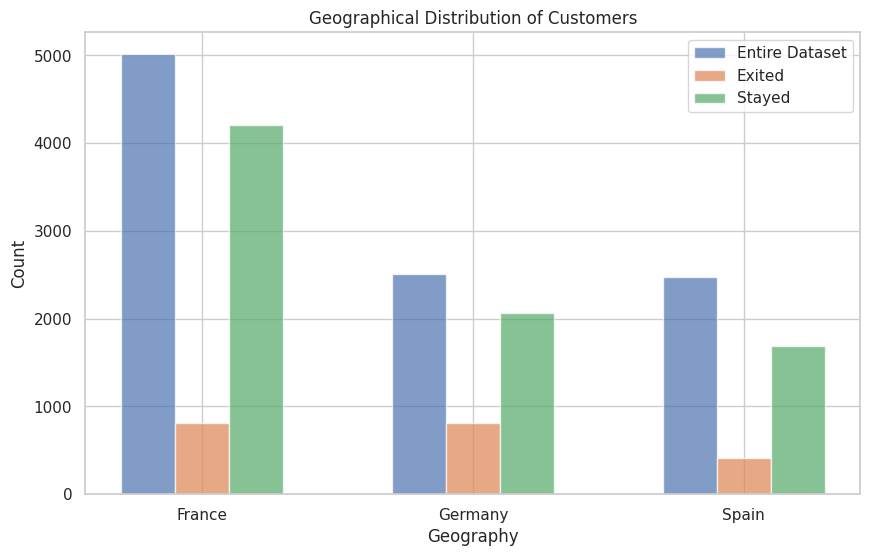

In [32]:
all_counts = df['Geography'].value_counts()

exited_counts = exited['Geography'].value_counts()
stayed_counts = stayed['Geography'].value_counts()

locations = all_counts.index

bar_width = 0.2

x = np.arange(len(locations))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, all_counts, bar_width, label='Entire Dataset', alpha=0.7)
plt.bar(x, exited_counts, bar_width, label='Exited', alpha=0.7)
plt.bar(x + bar_width, stayed_counts, bar_width, label='Stayed', alpha=0.7)

plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geographical Distribution of Customers')
plt.xticks(x, locations)
plt.legend()
plt.show()

While the majority of our customer base is located in France, it's noteworthy that a significant number of account closures have occurred in Germany.

In [33]:
stayed['NumOfProducts'].value_counts()

2.0    4241
1.0    3675
3.0      46
Name: NumOfProducts, dtype: int64

In [34]:
exited['NumOfProducts'].value_counts()


1.0    1409
2.0     349
3.0     220
4.0      60
Name: NumOfProducts, dtype: int64

It appears the more products a customer has the more likely they are to stay

In [35]:
stayed['HasCrCard'].value_counts()

1.0    5630
0.0    2332
Name: HasCrCard, dtype: int64

In [36]:
exited['HasCrCard'].value_counts()

1.0    1425
0.0     613
Name: HasCrCard, dtype: int64

Customers that closed their account had a higher percentage of credit cards

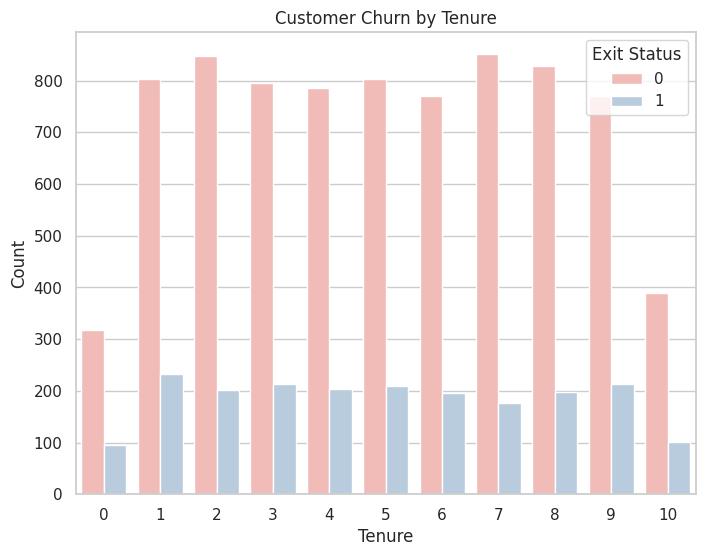

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='Tenure', hue='Exited', palette='Pastel1', data=df)

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Customer Churn by Tenure')
plt.legend(title='Exit Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## Handling Outliers

In [38]:
# Define the columns you want to check for outliers
columns_to_check = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']

# Loop through each column and remove outliers using the IQR method
for column in columns_to_check:
    # Calculating the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask to filter out outliers
    outliers_mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    # Removing outliers from the DataFrame
    df = df[outliers_mask]

In [39]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,650.690740,37.735786,5.015364,76434.055500,1.515991,0.705163,0.503658,100094.184752,0.197742,3.017977,605.917015
std,96.093507,8.782984,2.887869,62416.191144,0.549766,0.455993,0.500013,57522.969343,0.398318,1.404085,225.878992
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51014.837500,0.000000,2.000000,411.000000
50%,652.000000,37.000000,5.000000,97089.635000,1.000000,1.000000,1.000000,100129.330000,0.000000,3.000000,603.000000
75%,717.000000,43.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149461.830000,0.000000,4.000000,800.000000
max,850.000000,62.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000,5.000000,1000.000000


## Converting the categorical columns to numerical one

In [40]:
# Define mapping dictionaries
gender_mapping = {'Male': 0, 'Female': 1}
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
card_type_mapping = {'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}

# Apply mappings to the DataFrame
df['Gender'] = df['Gender'].map(gender_mapping)
df['Geography'] = df['Geography'].map(geography_mapping)
df['Card Type'] = df['Card Type'].map(card_type_mapping)

gender= {'Male': 0, 'Female': 1}      
geography = {'France': 0, 'Spain': 1, 'Germany': 2}         
card_type = {'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [42]:
# Seperating independent and dependent features
X = df.drop(['Exited'],axis=1)

y = df['Exited']

In [43]:
# Train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [44]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (7654, 13)
y_train shape: (7654,)


### Applying standard Scaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training**

## Logistic Regression

In [46]:
LR = LogisticRegression(max_iter=1000)

In [47]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
train_pred = LR.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

Training Accuracy: 82.96%


#### Making Predictions on test data

In [49]:
y_test_pred = LR.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 83.39%


In [50]:
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Test Confusion Matrix:
 [[1485   46]
 [ 272  111]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1531
           1       0.71      0.29      0.41       383

    accuracy                           0.83      1914
   macro avg       0.78      0.63      0.66      1914
weighted avg       0.82      0.83      0.80      1914



## Decision Tree

In [51]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_DT = grid_search.best_estimator_

# Evaluate on training data
DT_train_pred = best_DT.predict(X_train)
DT_train_accuracy = accuracy_score(y_train, DT_train_pred)
print("Training Accuracy: {:.2f}%".format(DT_train_accuracy * 100))

# Evaluate on test data
DT_test_pred = best_DT.predict(X_test)
DT_test_accuracy = accuracy_score(y_test, DT_test_pred)
print("Testing Accuracy: {:.2f}%".format(DT_test_accuracy * 100))

# Print the classification report
class_report = classification_report(y_test, DT_test_pred)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training Accuracy: 86.07%
Testing Accuracy: 84.95%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1531
           1       0.72      0.41      0.52       383

    accuracy                           0.85      1914
   macro avg       0.79      0.68      0.72      1914
weighted avg       0.84      0.85      0.83      1914



## Random Forest

In [52]:
RF = RandomForestClassifier(n_estimators =  150,
            max_depth= 11,
            min_samples_split= 7,
            min_samples_leaf=2,criterion = 'entropy'
)

In [53]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=150)

In [54]:
# Evaluate on training data
y_pred_train = RF.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Make predictions and evaluate on test data
y_pred_test = RF.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)


print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")

Training Accuracy: 90.44%
Testing Accuracy: 86.26%


In [55]:
from sklearn.metrics import classification_report

# Print the classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report for", RF, ":\n", class_report)

Classification Report for RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=150) :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1531
           1       0.80      0.42      0.55       383

    accuracy                           0.86      1914
   macro avg       0.83      0.70      0.73      1914
weighted avg       0.86      0.86      0.85      1914



## Extra Trees

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid_extra_trees = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

extra_trees = ExtraTreesClassifier()

grid_search_ext = GridSearchCV(extra_trees,param_grid_extra_trees,cv=5,scoring='accuracy')

grid_search_ext.fit(X_train,y_train)

best_params_ext = grid_search_ext.best_params_
print("Best Hyperparameters:", best_params_ext)

best_ext = grid_search_ext.best_estimator_

# Evaluate on training data
y_pred_train_ext = best_ext.predict(X_train)
accuracy_train_ext = accuracy_score(y_train, y_pred_train_ext)
print("Training Accuracy: {:.2f}%".format(accuracy_train_ext * 100))

# Evaluate on test data
y_pred_test_ext = best_ext.predict(X_test)
accuracy_test_ext = accuracy_score(y_test, y_pred_test_ext)
print("Testing Accuracy: {:.2f}%".format(accuracy_test_ext * 100))

# Print the classification report
class_report_ext = classification_report(y_test, y_pred_test_ext)
print("Classification Report for", best_ext, ":\n", class_report_ext)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 6}
Training Accuracy: 88.72%
Testing Accuracy: 85.53%
Classification Report for ExtraTreesClassifier(criterion='entropy', max_depth=11, min_samples_split=6) :
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1531
           1       0.87      0.33      0.47       383

    accuracy                           0.86      1914
   macro avg       0.86      0.66      0.70      1914
weighted avg       0.86      0.86      0.83      1914



## XGBoost

In [57]:
# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9,11],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2,0.3]
}

# Initialize the XGBClassifier
XGB = XGBClassifier()

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(XGB, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters:", best_params_xgb)

# Get the best model
best_XGB = grid_search_xgb.best_estimator_

# Evaluate on training data
y_pred_train_xgb = best_XGB.predict(X_train)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
print("Training Accuracy: {:.2f}%".format(accuracy_train_xgb * 100))

# Evaluate on test data
y_pred_test_xgb = best_XGB.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print("Testing Accuracy: {:.2f}%".format(accuracy_test_xgb * 100))

# Print the classification report
class_report_xgb = classification_report(y_test, y_pred_test_xgb)
print("Classification Report for", best_XGB, ":\n", class_report_xgb)


Best Hyperparameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
Training Accuracy: 88.08%
Testing Accuracy: 86.83%
Classification Report for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
               precision    recall  f1-score   support


The XGBoost Classifier demonstrates superior performance among the considered models, exhibiting the highest testing accuracy and the most favorable F1-score for predicting customer churn. Its balanced precision and recall for class 1 make it a robust choice for identifying potential churn instances. In comparison, the Decision Tree Classifier and Extra Trees Classifier show slightly lower performance, while the Random Forest Classifier offers a competitive option. However, the XGBoost model outshines them, making it the preferred choice for creating a pickle file to address customer churn in the banking context

In [58]:
import pickle

with open('Classifier.pkl', 'wb') as xgb_classifier_file:
    pickle.dump(best_XGB, xgb_classifier_file)

### *Conclusion*

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

## Thank You